# Employee Attrition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Collab Datasets/IBMEmployee_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")

# Encode categorical variables
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target variable Attrition (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into training and testing sets (80-20 split)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print dataset info
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (1029, 26) (1029,)
Testing Set Shape: (441, 26) (441,)


<ipython-input-5-6bb355a136f9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="coolwarm")


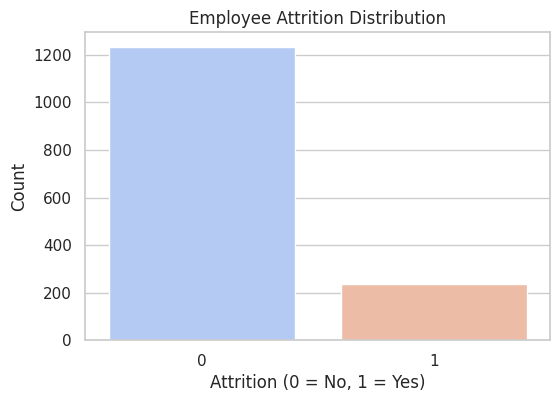

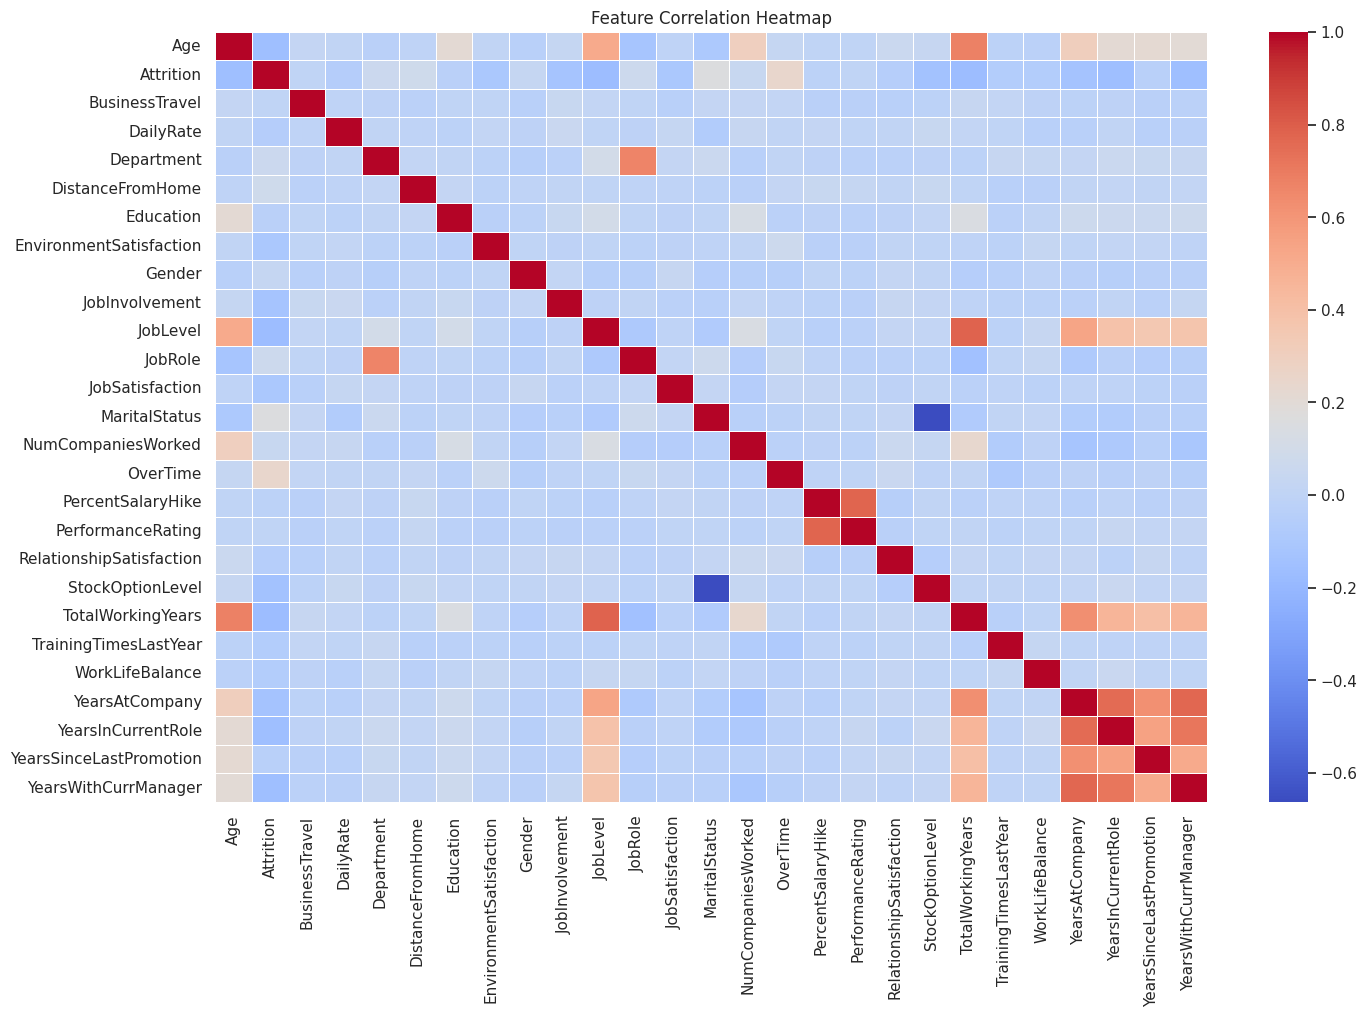

<ipython-input-5-6bb355a136f9>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"], palette="coolwarm", ax=axes[0, 0])
<ipython-input-5-6bb355a136f9>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["JobSatisfaction"], palette="coolwarm", ax=axes[0, 1])
<ipython-input-5-6bb355a136f9>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["TotalWorkingYears"], palette="coolwarm", ax=axes[1, 0])
<ipython-input-5-6bb355a136f9>:52: FutureWarning: 

Passing `palet

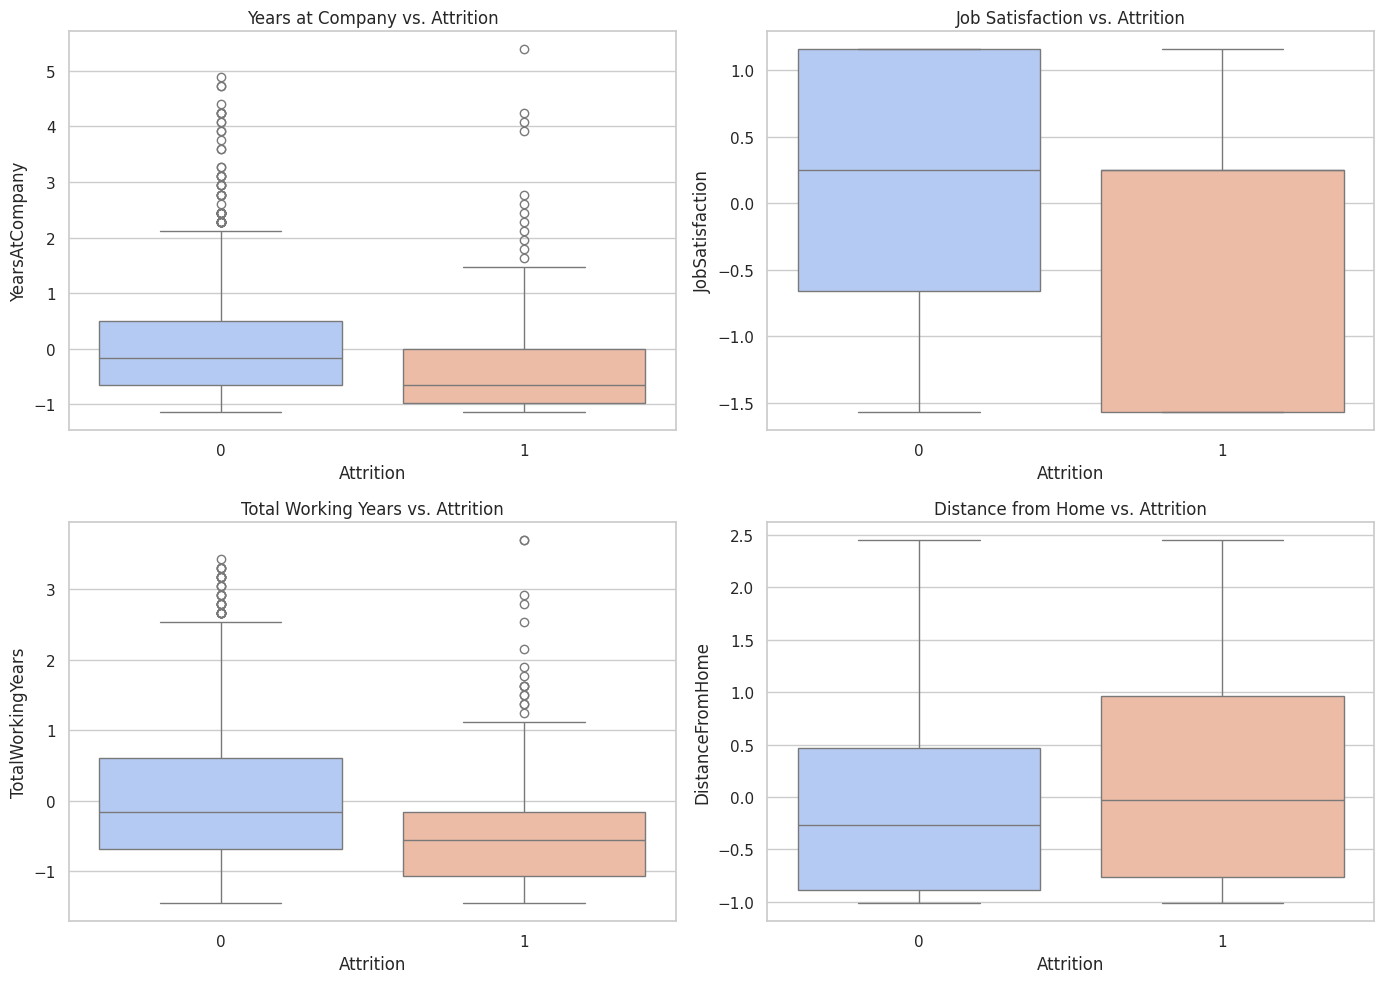

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Collab Datasets/IBMEmployee_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")

# Encode categorical variables
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target variable Attrition (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into training and testing sets (80-20 split)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attrition"], palette="coolwarm")
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for key features affecting Attrition
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"], palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Years at Company vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["JobSatisfaction"], palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Job Satisfaction vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["TotalWorkingYears"], palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Total Working Years vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["DistanceFromHome"], palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Distance from Home vs. Attrition")
plt.tight_layout()
plt.show()

#Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/drive/MyDrive/Collab Datasets/IBMEmployee_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")

# Encode categorical variables using One-Hot Encoding
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable Attrition
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Identify & Drop Highly Correlated Features
def drop_highly_correlated_features(df, threshold=0.75):
    """
    Drops features that are highly correlated with each other.
    """
    corr_matrix = df.corr()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)

    print("Dropping highly correlated features:", to_drop)
    return df.drop(columns=to_drop)

df = drop_highly_correlated_features(df)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Train-Test Split (80-20)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display final dataset shape
print("Final dataset shape after feature selection:", X_train.shape)


Dropping highly correlated features: {'YearsInCurrentRole', 'BusinessTravel_Travel_Rarely', 'YearsWithCurrManager', 'JobRole_Sales Executive', 'Department_Sales', 'TotalWorkingYears', 'PerformanceRating'}
Final dataset shape after feature selection: (1176, 29)




```


```

# Updates after feature engineering

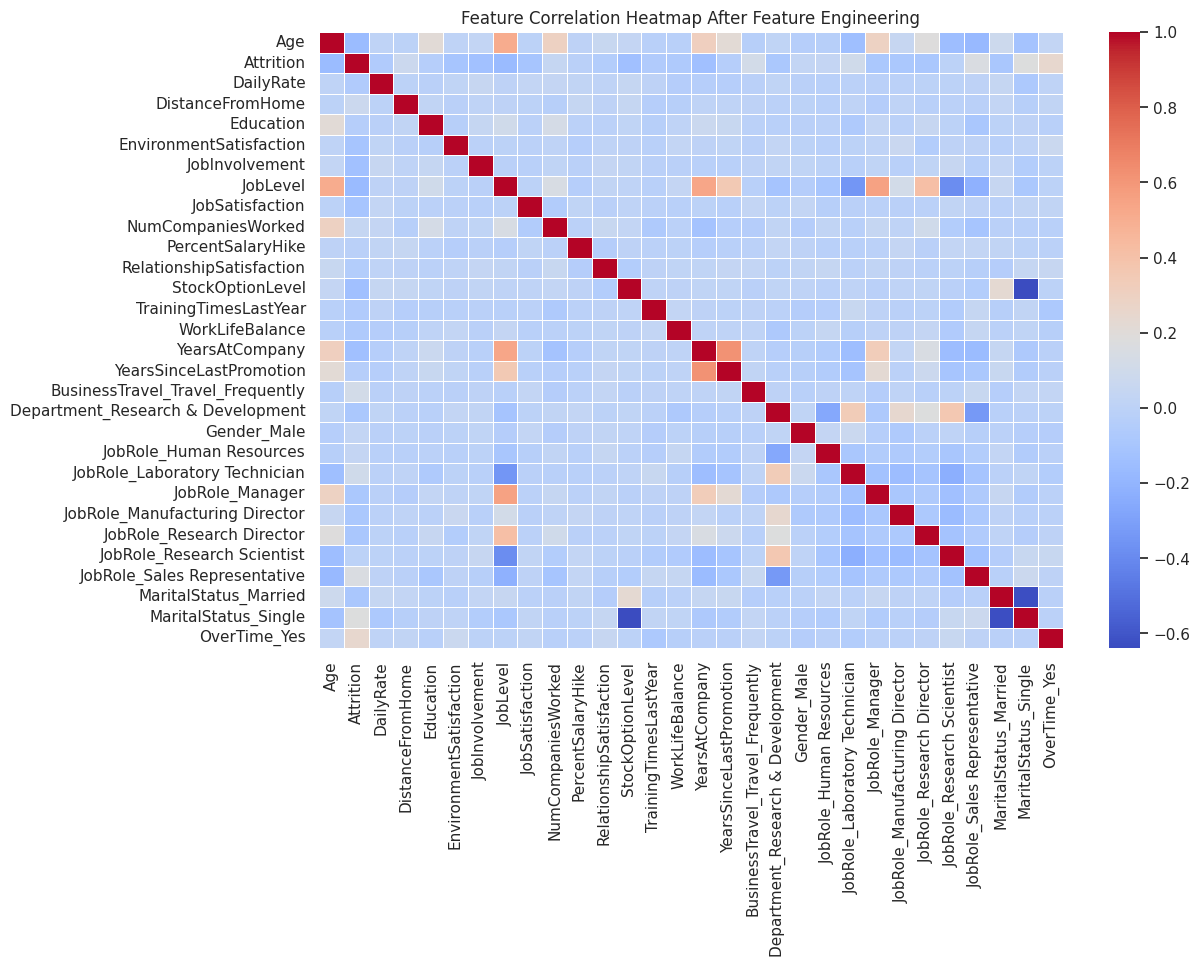

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap After Feature Engineering")
plt.show()


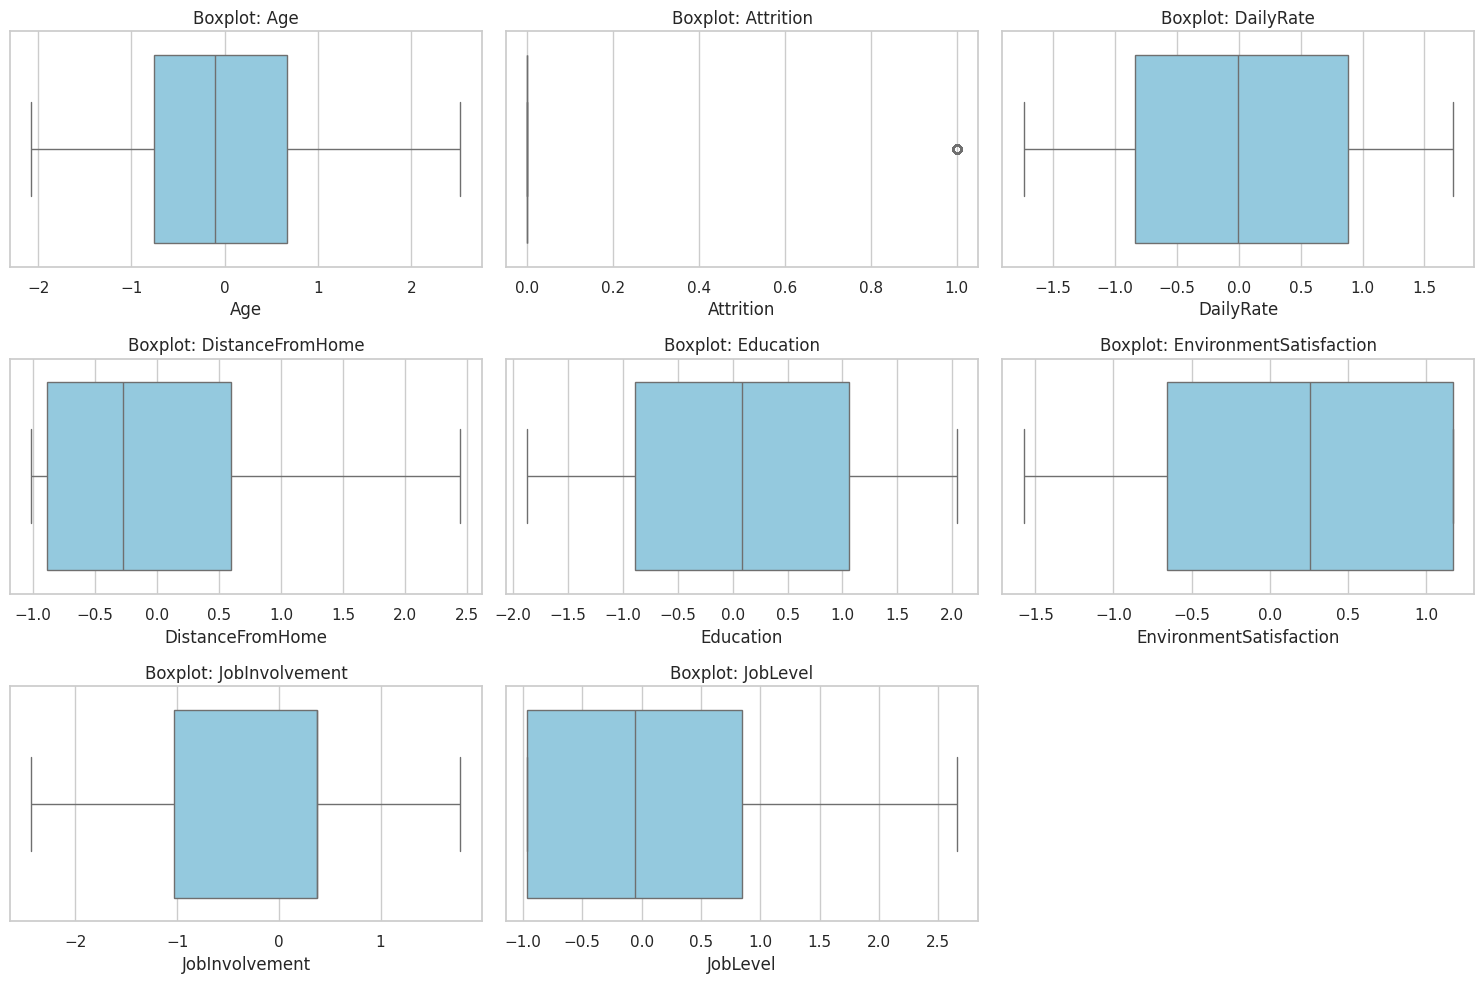

In [ ]:
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:8]):  # Plot first 8 numerical features
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()


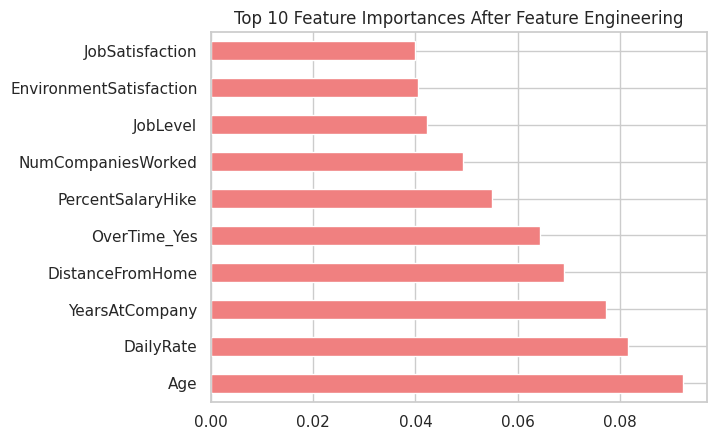

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train a basic model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", color="lightcoral")
plt.title("Top 10 Feature Importances After Feature Engineering")
plt.show()


# Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
# Define features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train_s, X_test_s,y_train_s,y_test_s = train_test_split(X_res,y_res,random_state=42,train_size=0.8)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)


<ipython-input-11-ea7a0f78e616>:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())


# Logistic Regression



without smote

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8810
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.73      0.40      0.52        47

    accuracy                           0.88       294
   macro avg       0.81      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294



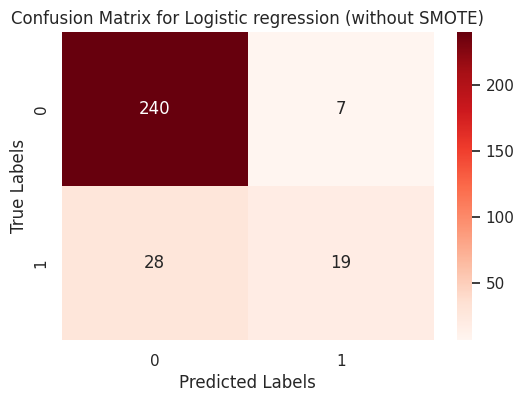

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix for Logistic regression (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
log_model1 = LogisticRegression()
log_model1.fit(X_train_s, y_train_s)
y_pred_log = log_model1.predict(X_test_s)
log_acc1 = accuracy_score(y_test_s, y_pred_log)

print(f"Logistic Regression Accuracy: {log_acc1:.4f}")
print(classification_report(y_test_s, y_pred_log))


Logistic Regression Accuracy: 0.8583
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       250
           1       0.85      0.87      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



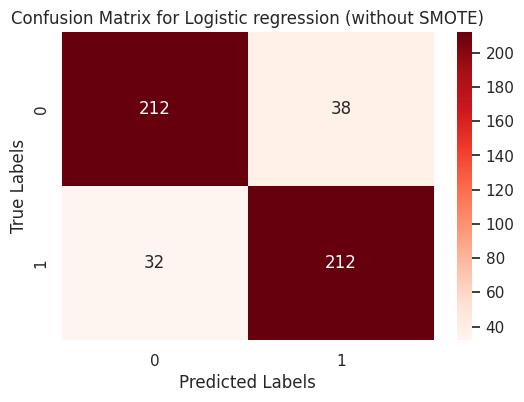

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_log), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix for Logistic regression (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Decision Tree Classifier



without smote

In [ ]:
def draw_c_matrix(y_test, y_pred):
  plt.figure(figsize=(6, 4))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
  plt.title("Confusion Matrix for Random forest (with SMOTE)")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7687
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.31      0.36      0.33        47

    accuracy                           0.77       294
   macro avg       0.59      0.60      0.60       294
weighted avg       0.78      0.77      0.78       294



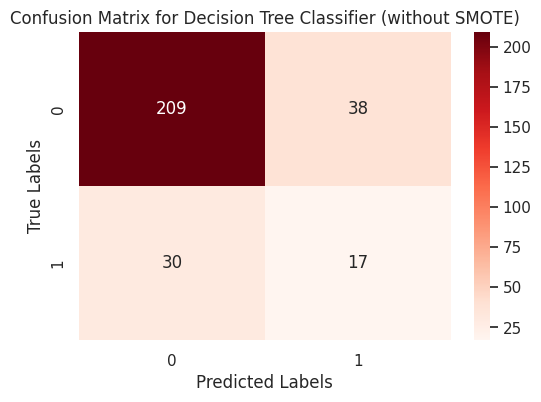

In [ ]:
draw_c_matrix(y_test, y_pred_dt)

with smote

In [ ]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(X_train_s, y_train_s)
y_pred_dt = dt_model1.predict(X_test_s)
dt_acc1 = accuracy_score(y_test_s, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_acc1:.4f}")
print(classification_report(y_test_s, y_pred_dt))


Decision Tree Accuracy: 0.8502
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       250
           1       0.83      0.88      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



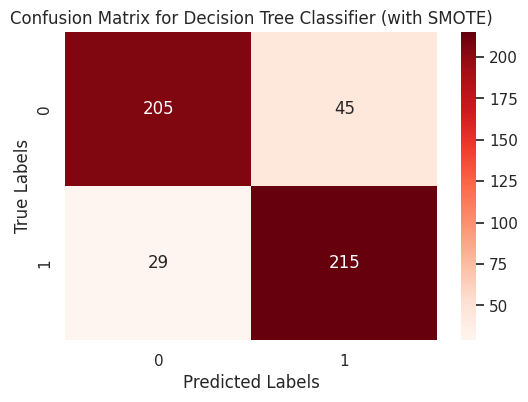

In [ ]:
draw_c_matrix(y_test_s, y_pred_dt)

# Random Forest Classifier

without smote

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294



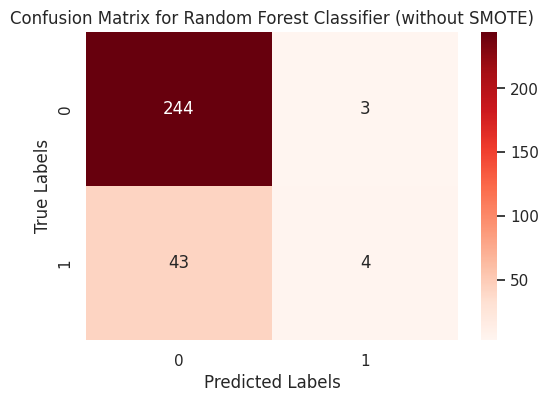

In [ ]:
draw_c_matrix(y_test, y_pred_rf)

with smote

In [ ]:
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train_s, y_train_s)
y_pred_rf = rf_model1.predict(X_test_s)
rf_acc1 = accuracy_score(y_test_s, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc1:.4f}")
print(classification_report(y_test_s, y_pred_rf))

Random Forest Accuracy: 0.9413
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       250
           1       0.96      0.92      0.94       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



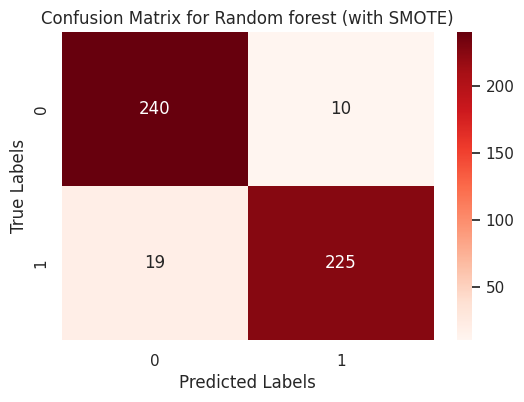

In [ ]:
draw_c_matrix(y_test_s, y_pred_rf)

# Support Vector Machine (SVM)



without smote

In [ ]:
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_acc:.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8673
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.83      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.87      0.83       294



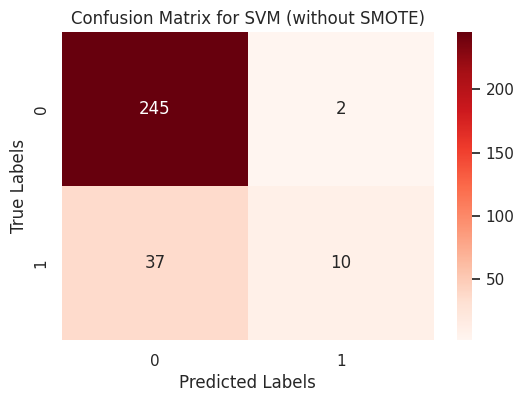

In [ ]:
draw_c_matrix(y_test, y_pred_svm)

with smote

In [ ]:
svm_model1 = SVC(kernel="rbf")
svm_model1.fit(X_train_s, y_train_s)
y_pred_svm = svm_model1.predict(X_test_s)
svm_acc1 = accuracy_score(y_test_s, y_pred_svm)

print(f"SVM Accuracy: {svm_acc1:.4f}")
print(classification_report(y_test_s, y_pred_svm))


SVM Accuracy: 0.9190
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       250
           1       0.92      0.92      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



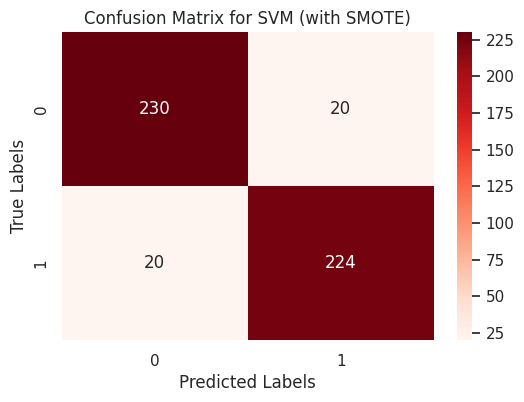

In [ ]:
draw_c_matrix(y_test_s, y_pred_svm)

# K-Nearest Neighbors (KNN)



without smote

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {knn_acc:.4f}")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.54      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.70      0.56      0.57       294
weighted avg       0.81      0.84      0.80       294



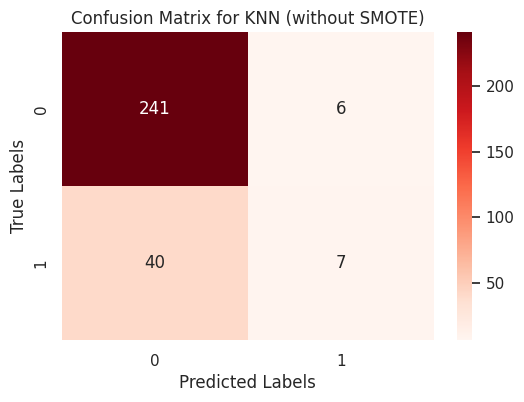

In [ ]:
draw_c_matrix(y_test, y_pred_knn)

with smote

In [ ]:
knn_model1 = KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(X_train_s, y_train_s)
y_pred_knn = knn_model1.predict(X_test_s)
knn_acc1 = accuracy_score(y_test_s, y_pred_knn)

print(f"KNN Accuracy: {knn_acc1:.4f}")
print(classification_report(y_test_s, y_pred_knn))

KNN Accuracy: 0.9049
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       250
           1       0.85      0.98      0.91       244

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.91      0.90      0.90       494



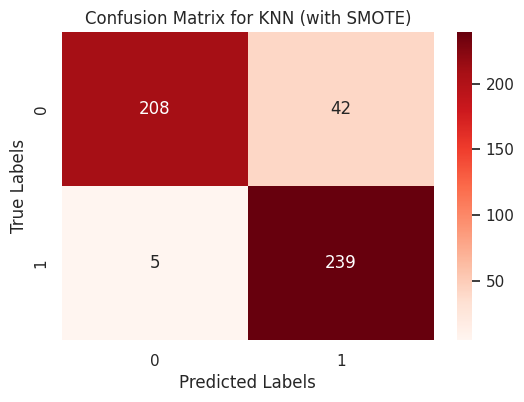

In [ ]:
draw_c_matrix(y_test_s, y_pred_knn)

# Naive Bayes

without smote

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6973
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       247
           1       0.31      0.70      0.43        47

    accuracy                           0.70       294
   macro avg       0.62      0.70      0.61       294
weighted avg       0.83      0.70      0.74       294



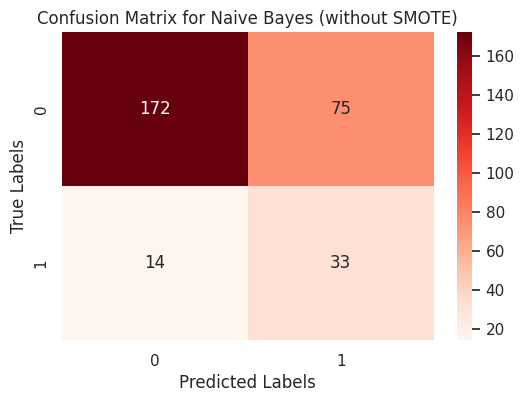

In [ ]:
draw_c_matrix(y_test, y_pred_nb)

with smote

In [ ]:
nb_model1 = GaussianNB()
nb_model1.fit(X_train_s, y_train_s)
y_pred_nb = nb_model1.predict(X_test_s)
nb_acc1 = accuracy_score(y_test_s, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
print(classification_report(y_test_s, y_pred_nb))


Naive Bayes Accuracy: 0.6973
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       250
           1       0.72      0.85      0.78       244

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.76       494
weighted avg       0.77      0.77      0.76       494



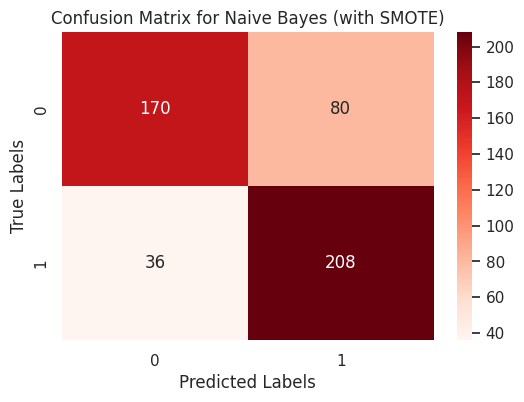

In [ ]:
draw_c_matrix(y_test_s, y_pred_nb)

#Gradient Boosting

without smote

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8503
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.58      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.72      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



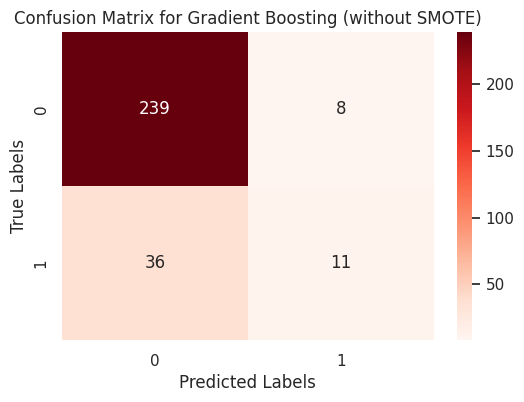

In [ ]:
draw_c_matrix(y_test, y_pred_gb)

with smote

In [ ]:
gb_model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model1.fit(X_train_s, y_train_s)
y_pred_gb = gb_model1.predict(X_test_s)
gb_acc1 = accuracy_score(y_test_s, y_pred_gb)

print(f"Gradient Boosting Accuracy: {gb_acc1:.4f}")
print(classification_report(y_test_s, y_pred_gb))

Gradient Boosting Accuracy: 0.9271
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



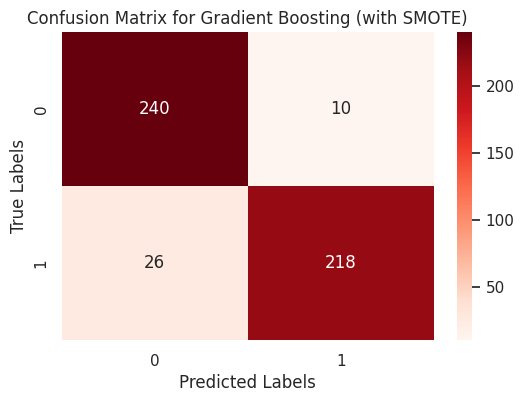

In [ ]:
draw_c_matrix(y_test_s, y_pred_gb)

# AdaBoost Classifier

without smote

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)

print(f"AdaBoost Accuracy: {ada_acc:.4f}")
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8776
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.79      0.32      0.45        47

    accuracy                           0.88       294
   macro avg       0.84      0.65      0.69       294
weighted avg       0.87      0.88      0.85       294



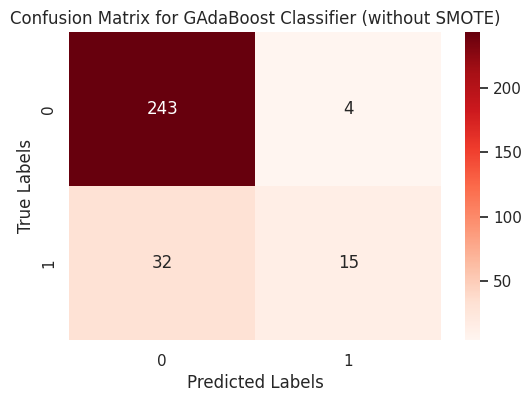

In [ ]:
draw_c_matrix(y_test, y_pred_ada)

with smote

In [ ]:
ada_model1 = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model1.fit(X_train_s, y_train_s)
y_pred_ada = ada_model1.predict(X_test_s)
ada_acc1 = accuracy_score(y_test_s, y_pred_ada)

print(f"AdaBoost Accuracy: {ada_acc1:.4f}")
print(classification_report(y_test_s, y_pred_ada))

AdaBoost Accuracy: 0.9069
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.92      0.89      0.90       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



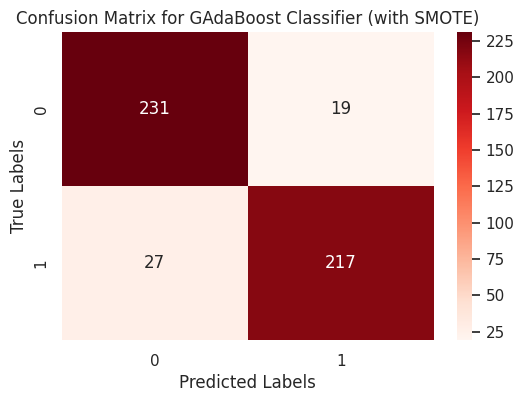

In [ ]:
draw_c_matrix(y_test_s, y_pred_ada)

#XGBoost

without smote

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8571
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


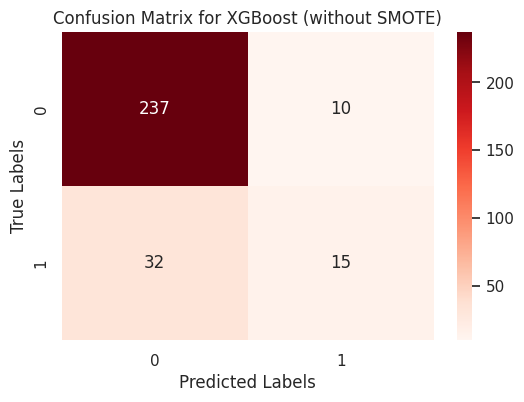

In [ ]:
draw_c_matrix(y_test, y_pred_xgb)

with smote

In [ ]:
xgb_model1 = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model1.fit(X_train_s, y_train_s)
y_pred_xgb = xgb_model1.predict(X_test_s)
xgb_acc1 = accuracy_score(y_test_s, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_acc1:.4f}")
print(classification_report(y_test_s, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       250
           1       0.96      0.93      0.95       244

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



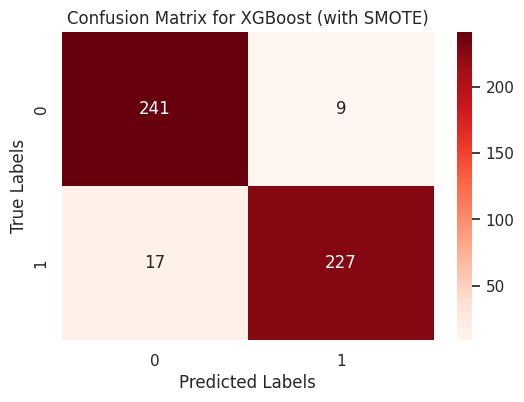

In [ ]:
draw_c_matrix(y_test_s, y_pred_xgb)

#LightGBM

without smote

In [ ]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)

print(f"LightGBM Accuracy: {lgbm_acc:.4f}")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632
LightGBM Accuracy: 0.8571
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


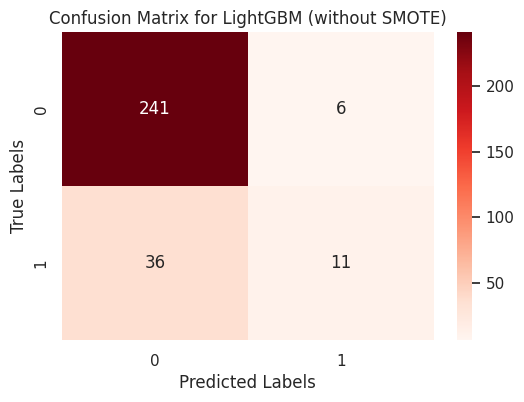

In [ ]:
draw_c_matrix(y_test, y_pred_lgbm)

with smote

In [ ]:
lgbm_model1 = LGBMClassifier()
lgbm_model1.fit(X_train_s, y_train_s)
y_pred_lgbm = lgbm_model1.predict(X_test_s)
lgbm_acc1 = accuracy_score(y_test_s, y_pred_lgbm)

print(f"LightGBM Accuracy: {lgbm_acc1:.4f}")
print(classification_report(y_test_s, y_pred_lgbm))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3713
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085
LightGBM Accuracy: 0.9393
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       250
           1       0.95      0.92      0.94       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


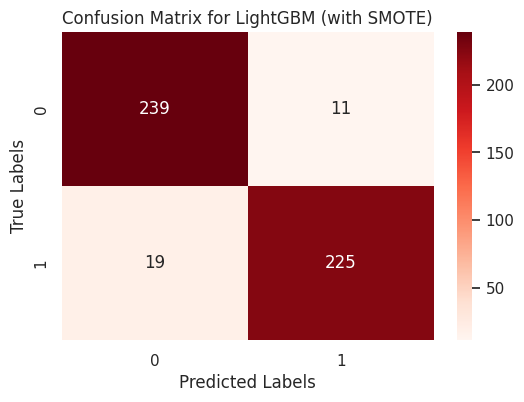

In [ ]:
draw_c_matrix(y_test_s, y_pred_lgbm)

# Compare Model Performance

without smote

<ipython-input-56-cdef4eacb32f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")


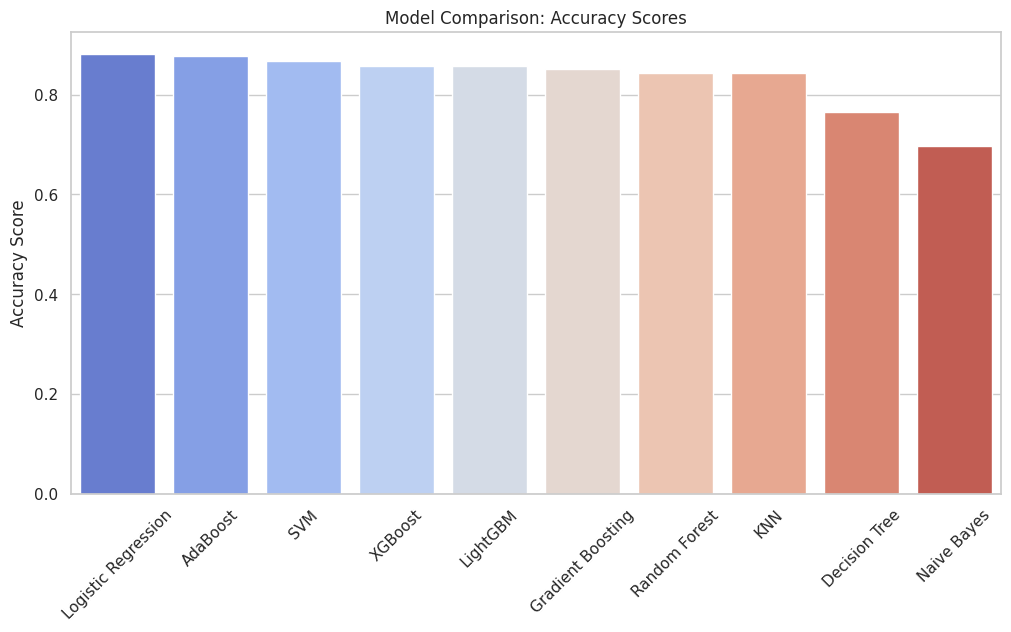

In [ ]:
# Store results in a dictionary
model_results = {
    "Logistic Regression": log_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "SVM": svm_acc,
    "KNN": knn_acc,
    "Naive Bayes": nb_acc,
    "Gradient Boosting": gb_acc,
    "AdaBoost": ada_acc,
    "XGBoost": xgb_acc,
    "LightGBM": lgbm_acc
}

# Sort models by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)

# Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy Scores")
plt.show()


In [ ]:
# Create a dictionary of model objects
model_objects = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": ada_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

# Identify the best model based on accuracy
best_model_name = max(model_results, key=model_results.get)
best_model = model_objects[best_model_name]  # Get the actual model object

print(f"Best Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.4f}")


Best Model: Logistic Regression with Accuracy: 0.8810


with smote

<ipython-input-66-642ea4180af4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")


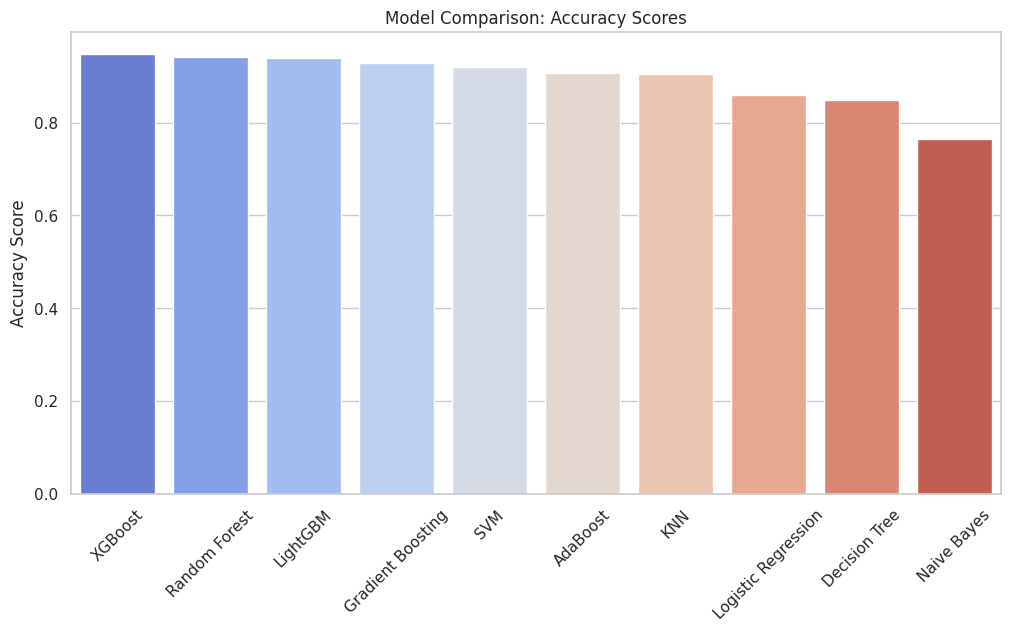

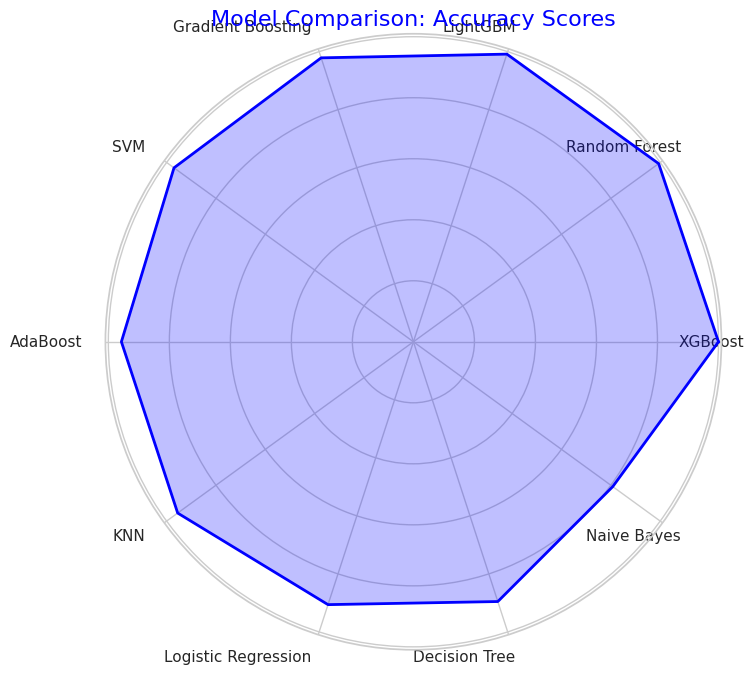

<ipython-input-66-642ea4180af4>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=models, y=accuracies, jitter=True, palette="coolwarm", size=10)


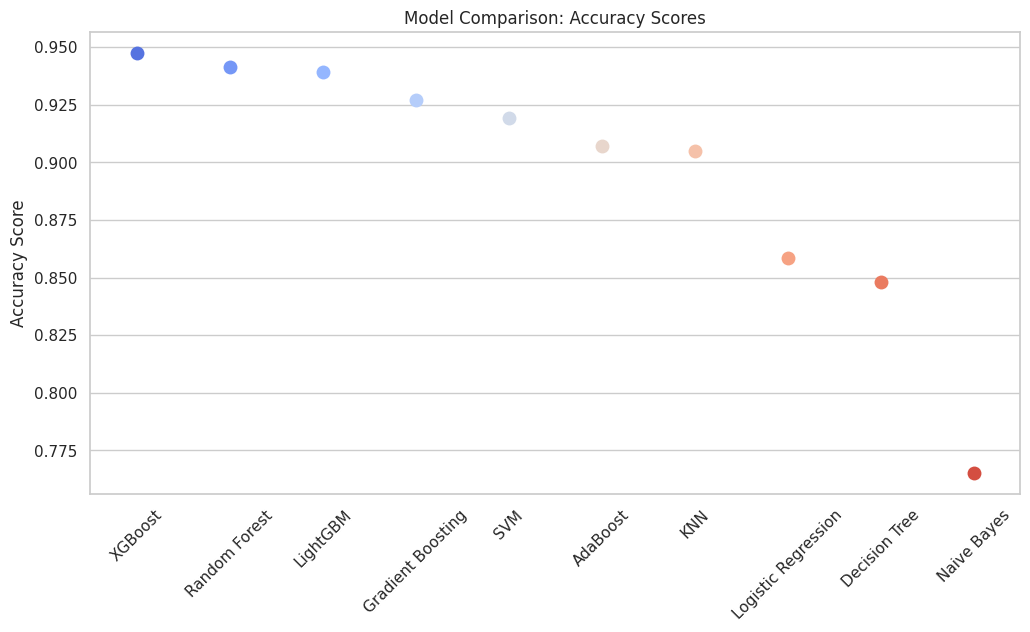

<ipython-input-66-642ea4180af4>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=df, palette="coolwarm")


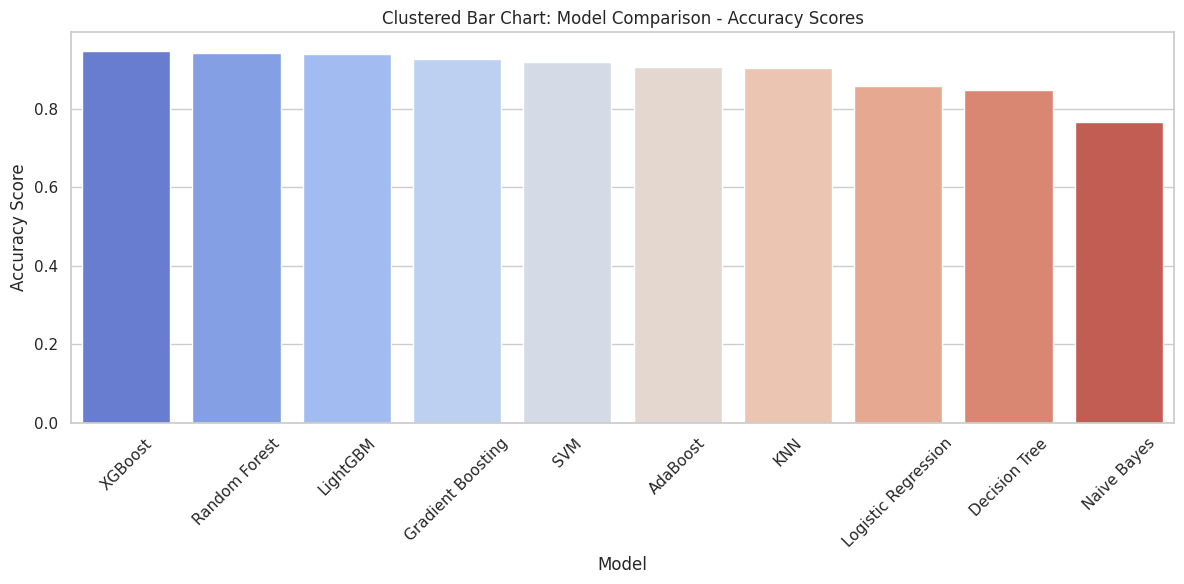

<ipython-input-66-642ea4180af4>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=models, palette="viridis")


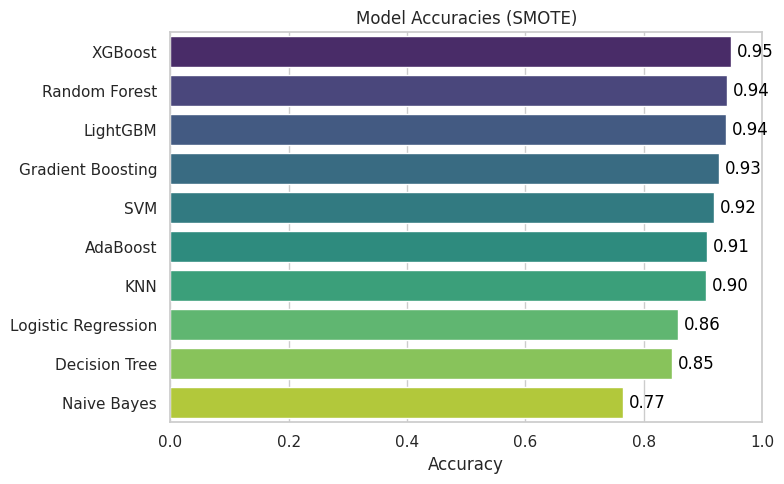

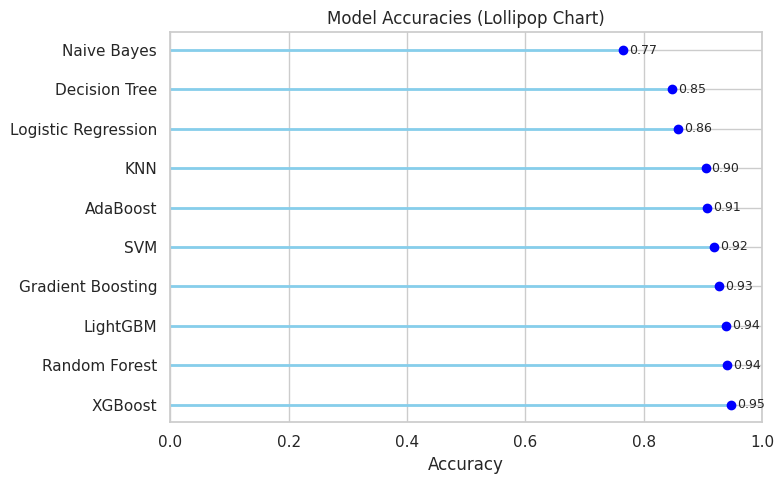

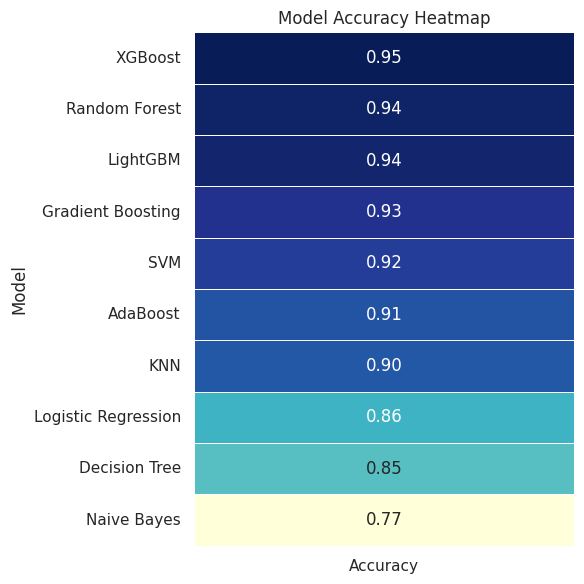

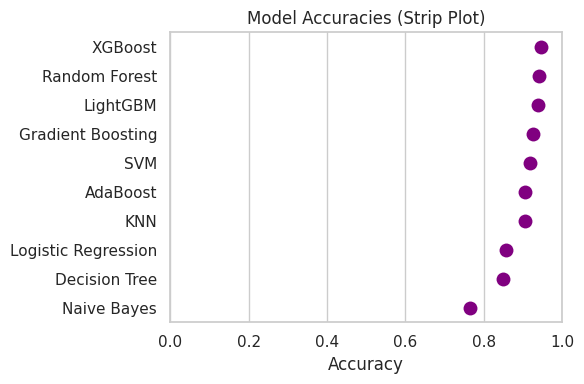

In [ ]:
# Store results in a dictionary
model_results = {
    "Logistic Regression": log_acc1,
    "Decision Tree": dt_acc1,
    "Random Forest": rf_acc1,
    "SVM": svm_acc1,
    "KNN": knn_acc1,
    "Naive Bayes": nb_acc1,
    "Gradient Boosting": gb_acc1,
    "AdaBoost": ada_acc1,
    "XGBoost": xgb_acc1,
    "LightGBM": lgbm_acc1
}

# Sort models by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)

# Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy Scores")
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Extract model names and accuracy scores
models = [x[0] for x in sorted_results]
accuracies = [x[1] for x in sorted_results]

# Normalize accuracies to the range [0, 1] if needed (you can skip if already normalized)
max_accuracy = max(accuracies)
normalized_accuracies = [acc / max_accuracy for acc in accuracies]

# Number of variables (models)
num_vars = len(models)

# Set up the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to make the chart circular

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, normalized_accuracies + [normalized_accuracies[0]], color='blue', alpha=0.25)
ax.plot(angles, normalized_accuracies + [normalized_accuracies[0]], color='blue', linewidth=2)

# Labels for each model
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models, rotation=45, ha='right')

# Title
plt.title("Model Comparison: Accuracy Scores", size=16, color='blue')

# Show the radar chart
plt.show()



import seaborn as sns
# Extract model names and accuracy scores
models = [x[0] for x in sorted_results]
accuracies = [x[1] for x in sorted_results]

# Plot the dot plot
plt.figure(figsize=(12, 6))
sns.stripplot(x=models, y=accuracies, jitter=True, palette="coolwarm", size=10)

# Customize plot
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy Scores")

# Show the plot
plt.show()


 #Extract model names and accuracy scores
models = [x[0] for x in sorted_results]
accuracies = [x[1] for x in sorted_results]

# Create a DataFrame for clustered bars
import pandas as pd
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies
})

# Plotting the clustered bar chart
plt.figure(figsize=(12, 6))

# Create barplot using seaborn
sns.barplot(x="Model", y="Accuracy", data=df, palette="coolwarm")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Set plot labels and title
plt.ylabel("Accuracy Score")
plt.title("Clustered Bar Chart: Model Comparison - Accuracy Scores")

# Show the plot
plt.tight_layout()
plt.show()




# Extract model names and accuracy scores
models = [x[0] for x in sorted_results]
scores = [x[1] for x in sorted_results]

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=scores, y=models, palette="viridis")

# Add labels to each bar
for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Labeling and layout
plt.xlabel("Accuracy")
plt.title("Model Accuracies (SMOTE)")
plt.xlim(0, 1)  # Set x-axis from 0 to 1 for better scale
plt.tight_layout()
plt.show()



# Extract sorted model names and accuracy scores
models = [x[0] for x in sorted_results]
scores = [x[1] for x in sorted_results]

# Plot lollipop chart
plt.figure(figsize=(8, 5))
plt.hlines(y=models, xmin=0, xmax=scores, color='skyblue', linewidth=2)
plt.plot(scores, models, "o", color='blue')

# Add text labels to dots
for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=9)

# Customize plot
plt.xlabel("Accuracy")
plt.title("Model Accuracies (Lollipop Chart)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()




# Extract sorted model names and accuracy scores
models = [x[0] for x in sorted_results]
scores = [x[1] for x in sorted_results]

# Create DataFrame for heatmap
df_heat = pd.DataFrame({"Model": models, "Accuracy": scores})
df_heat = df_heat.set_index("Model")

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(df_heat, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5, fmt=".2f")

# Customize plot
plt.title("Model Accuracy Heatmap")
plt.tight_layout()
plt.show()


# Extract model names and accuracy scores
models = [x[0] for x in sorted_results]
scores = [x[1] for x in sorted_results]

# Plot strip plot
plt.figure(figsize=(6, 4))
sns.stripplot(x=scores, y=models, color='purple', size=10)

# Customize plot
plt.xlabel("Accuracy")
plt.title("Model Accuracies (Strip Plot)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary of model objects
model_objects = {
    "Logistic Regression": log_model1,
    "Decision Tree": dt_model1,
    "Random Forest": rf_model1,
    "SVM": svm_model1,
    "KNN": knn_model1,
    "Naive Bayes": nb_model1,
    "Gradient Boosting": gb_model1,
    "AdaBoost": ada_model1,
    "XGBoost": xgb_model1,
    "LightGBM": lgbm_model1
}

# Identify the best model based on accuracy
best_model_name = max(model_results, key=model_results.get)
best_model = model_objects[best_model_name]  # Get the actual model object

print(f"Best Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.4f}")


Best Model: XGBoost with Accuracy: 0.9474


#  Confusion Matrix

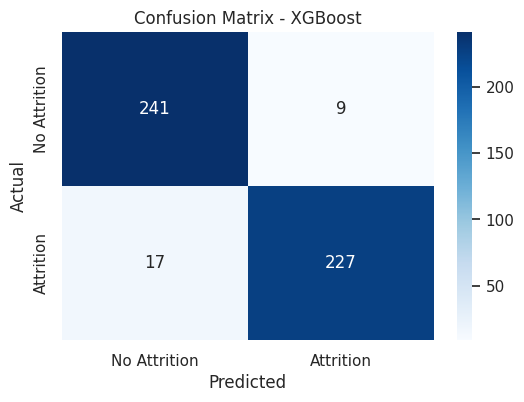

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_best = best_model.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()
